##### For every programs we need all essential libraries 

In [43]:
import numpy as np

# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import*
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator  # to run on simulator

# Loading your IBM Quantum account(s)  to run on real device
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-13 22:28:03,799: Credentials are already in use. The existing account in the session will be replaced.


*''' We are given a hidden Boolean function  f, which takes as input a string of bits, and returns either  0 or 1, that is:The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all 0's or all 1's for any input, while a balanced function returns  0's for exactly half of all inputs and  1
 's for the other half. Our task is to determine whether the given function is balanced or constant.
 '''*



## *The Algorithm is as follows*
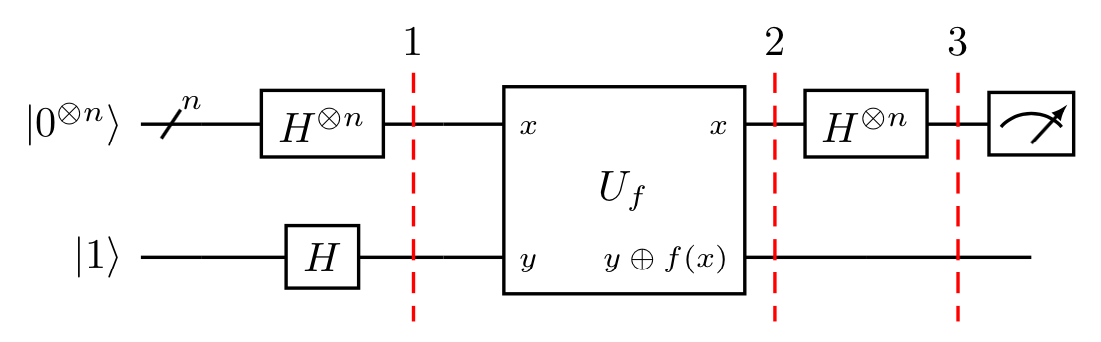

In [44]:
##### lets go

Enter the number of qubits4


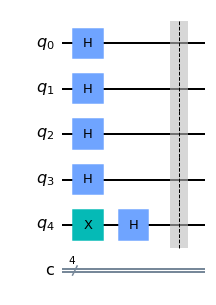

In [45]:
n = int(input('Enter the number of qubits'))
circuit = QuantumCircuit(n+1,n)

#now we can give the hadamards needed
for qubit in range(n):
    circuit.h(qubit)

circuit.x(n) #indexing starts from zero
circuit.h(n)
circuit.barrier()  # barrier is so helpfull in realisation of each steps
circuit.draw('mpl')


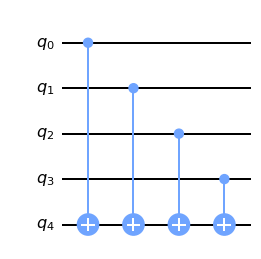

In [46]:
# lets create the Balanced oracle
bal_oracle = QuantumCircuit(n+1)
for qubit in range(n):
    bal_oracle.cx(qubit,n)
bal_oracle.draw('mpl')

<ipython-input-47-42afa5e90e52>:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += bal_oracle


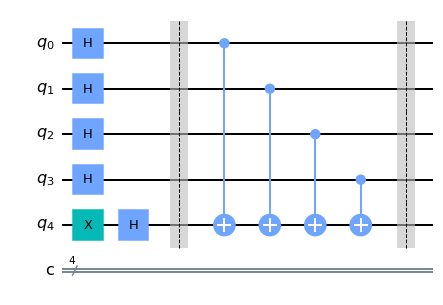

In [47]:
circuit += bal_oracle
circuit.barrier()
circuit.draw('mpl')

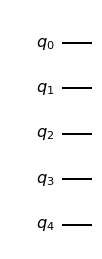

In [57]:
# the constant oracle will be
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2) # its a random number generator
if output == 1:
    const_oracle.x(n)
const_oracle.draw('mpl')

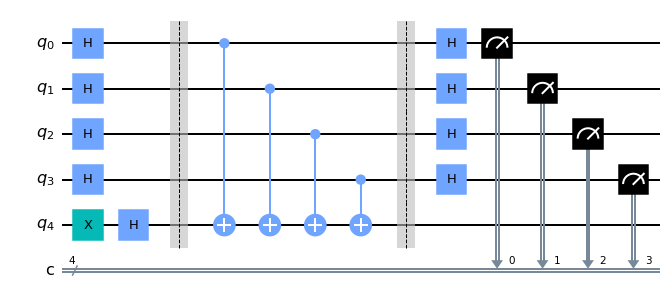

In [49]:
# lets go back to our balanced one and complete the algorithm
for qubit in range(n):
    circuit.h(qubit)
    circuit.measure(qubit,qubit)
circuit.draw('mpl')


In [50]:
circuit.barrier()

In [51]:
#end of algorithm
# lets see the result on simulation first

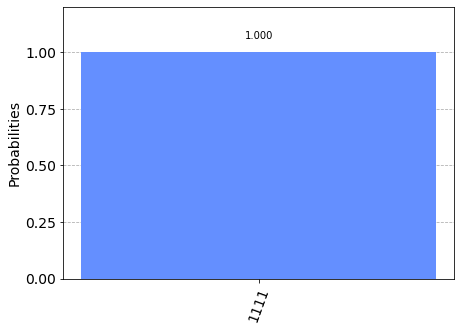

In [52]:
# use local simulator
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(circuit, simulator)
results = simulator.run(qobj).result().get_counts()
plot_histogram(results)

 **By the Deutsch Josza algorithm you can see the probability of measuring the state |0....00> is ZERO**

## *Now lets combine the oracles and make a general circuit*
*According to a random input the proram will show you which is the function*

In [91]:
N = int(input('Enter number of Qubits'))
Circuit = QuantumCircuit(N+1,N)

Enter number of Qubits3


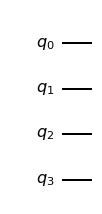

In [92]:
# the constant oracle will be
Const_oracle = QuantumCircuit(N+1)
output = np.random.randint(2) # its a random number generator
if output == 1:
    Const_oracle.x(N)
Const_oracle.draw('mpl')

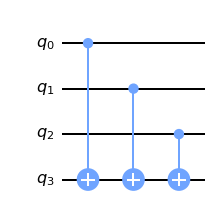

In [93]:
# lets create the Balanced oracle
Bal_oracle = QuantumCircuit(N+1)
for qubit in range(N):
    Bal_oracle.cx(qubit,N)
Bal_oracle.draw('mpl')

In [94]:
import numpy as np
x = np.random.randint(2)
if x == 1:
    oracle = Const_oracle
else:
    oracle = Bal_oracle


<ipython-input-95-8d0d04a54886>:8: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  Circuit += oracle


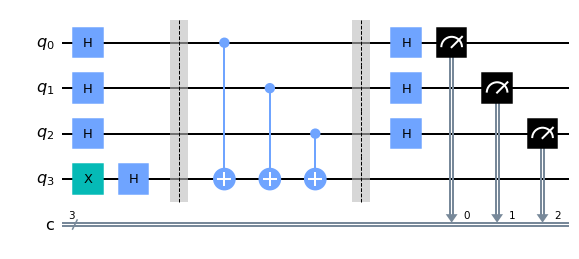

In [95]:
for qubit in range(N):
    Circuit.h(qubit)

Circuit.x(N) 
Circuit.h(N)
Circuit.barrier()  

Circuit += oracle 
Circuit.barrier()

for qubit in range(N):
    Circuit.h(qubit)
    Circuit.measure(qubit,qubit)
Circuit.draw('mpl')



Results :

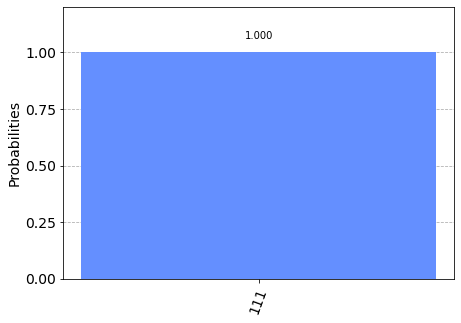

In [96]:
# use local simulator
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(Circuit, simulator)
results = simulator.run(qobj).result().get_counts()
plot_histogram(results)

In [97]:
# using a real quantum device

In [98]:
from qiskit.compiler import*

Job Status: job has successfully run


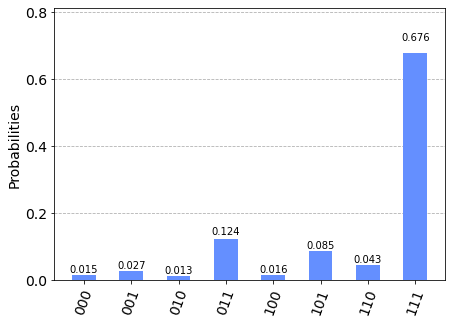

In [99]:
Provider = IBMQ.get_provider(hub='ibm-q')
Backend= Provider.get_backend('ibmq_quito') # this backend has only an upper limit of 5 qubits

from qiskit.tools.monitor import job_monitor
job = execute(Circuit,backend=Backend)
job_monitor(job)
Result = job.result().get_counts()

plot_histogram(Result)

In [ ]:
!

1